In [39]:
#obtengo los datos
import pandas as pd
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

data=pd.read_csv('/home/juan-pablo/Escritorio/Sist inteligente/datasets/adult.data', header=None, names=column_names, na_values='?')
display(data.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [40]:
#Analizo los datos
#Otbtengo los tipos de datos
dtypes=data.dtypes.to_dict()
print(dtypes)

#Obtengo los valores nulos
print(data.isnull().sum())
#No tengo datos nulos

#Convierto income en 1 o 0
income_dict = {' >50K': 1, ' <=50K': 0}
data['income'] = data['income'].map(income_dict)

{'age': dtype('int64'), 'workclass': dtype('O'), 'fnlwgt': dtype('int64'), 'education': dtype('O'), 'education-num': dtype('int64'), 'marital-status': dtype('O'), 'occupation': dtype('O'), 'relationship': dtype('O'), 'race': dtype('O'), 'sex': dtype('O'), 'capital-gain': dtype('int64'), 'capital-loss': dtype('int64'), 'hours-per-week': dtype('int64'), 'native-country': dtype('O'), 'income': dtype('O')}
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [41]:
#2 Separo en x e y

data_original=data.copy()

X=data.drop('income', axis=1)
Y=data['income']

#Print de ambos para ver que se separaron bien

print(X)
print(Y)

       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [42]:
#3 Separo en train y test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


       age  workclass  fnlwgt  education  education-num  marital-status  \
15282   36          4  174308          1              7               0   
24870   35          4  198202         11              9               4   
18822   38          4   52963          9             13               4   
26404   50          4  138270         11              9               2   
7842    68          6  116903          8             11               2   
...    ...        ...     ...        ...            ...             ...   
13123   43          2   33331         12             14               2   
19648   44          4   98466          0              6               4   
9845    23          4   45317         15             10               5   
10799   45          2  215862         10             16               2   
2732    25          4  186925         15             10               4   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
15282          14        

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'education'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'marital-status'}>,
        <AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'relationship'}>],
       [<AxesSubplot:title={'center':'race'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>,
        <AxesSubplot:title={'center':'native-country'}>,
        <AxesSubplot:title={'center':'income'}>, <AxesSubplot:>]],
      dtype=object)

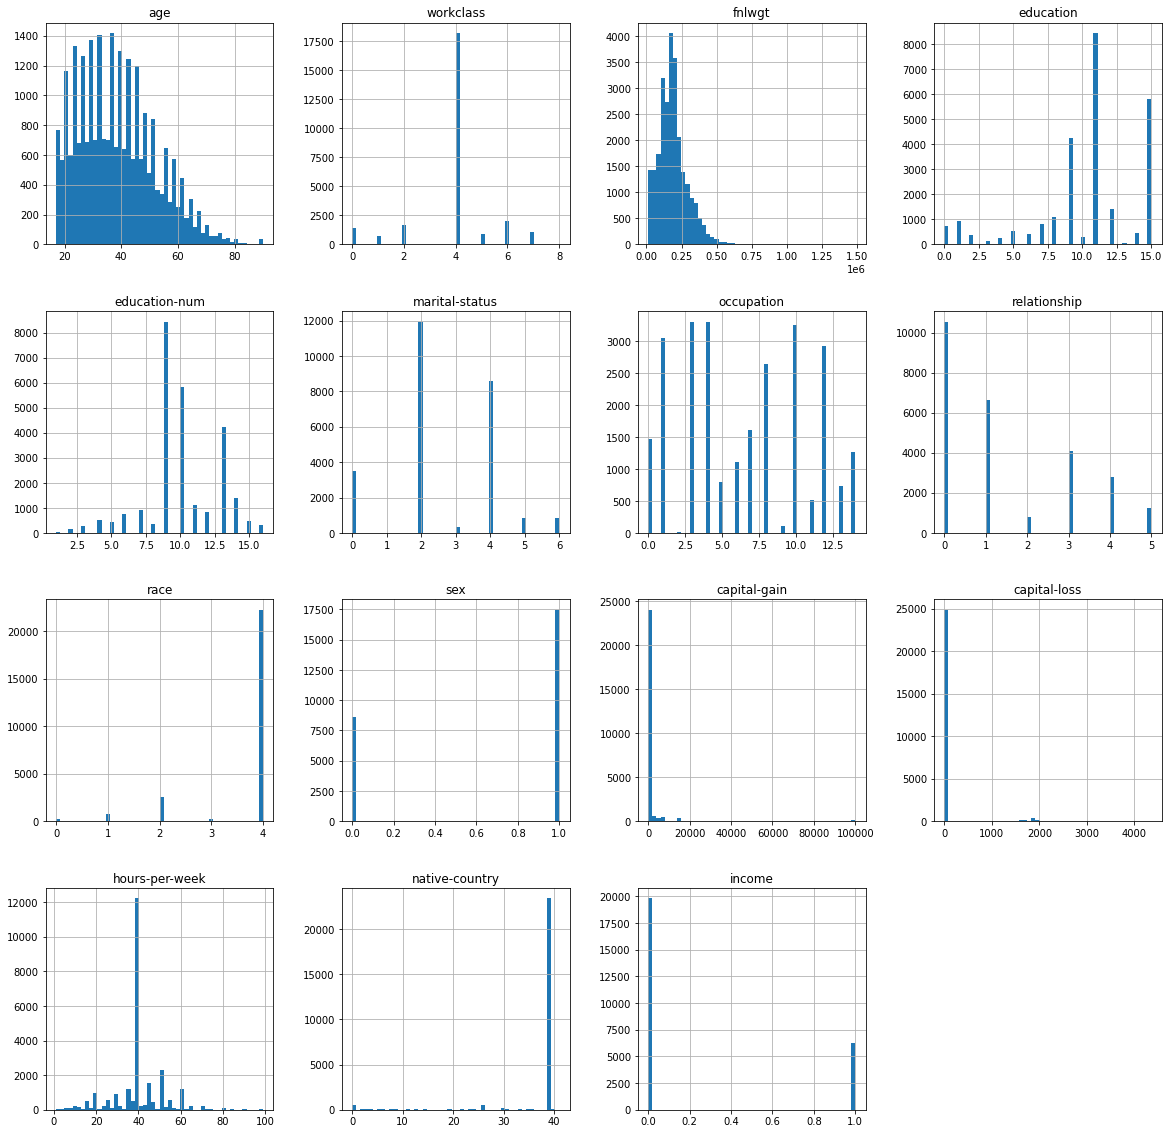

In [61]:
#4 Ahora seguimos con la exploracion de datos 
#uno las columnas de x_train y
# y_train para poder hacer un grafico de barras, con join

train_data= x_train.join(y_train)
print(train_data)

#Genero histograma
train_data.hist(bins=50,figsize=(20,20))



In [44]:
#Hago la correlacion con respecto a la variable objetivo

corr=train_data.corr()
print(corr['income'].sort_values(ascending=False))

income            1.000000
education-num     0.334991
age               0.233217
hours-per-week    0.231219
capital-gain      0.224303
capital-loss      0.146447
fnlwgt           -0.014185
Name: income, dtype: float64


/tmp/ipykernel_9936/3373799099.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=train_data.corr()


/tmp/ipykernel_9936/2057006959.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu', ax=ax)


<AxesSubplot:>

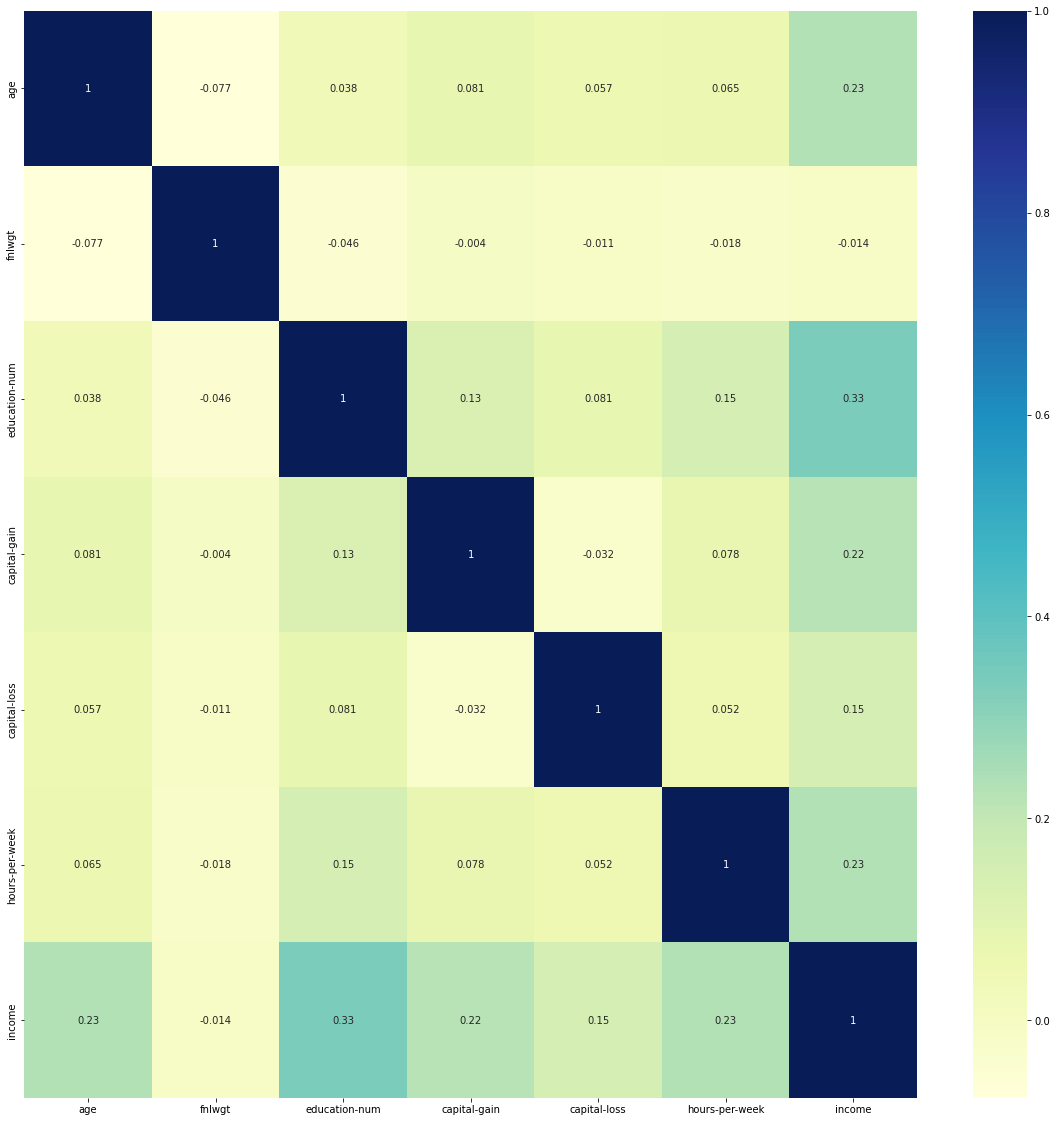

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns 
#seguimos con la exploracion de los datos, realizo un heat map para ver la correlacion entre las variables
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu', ax=ax)


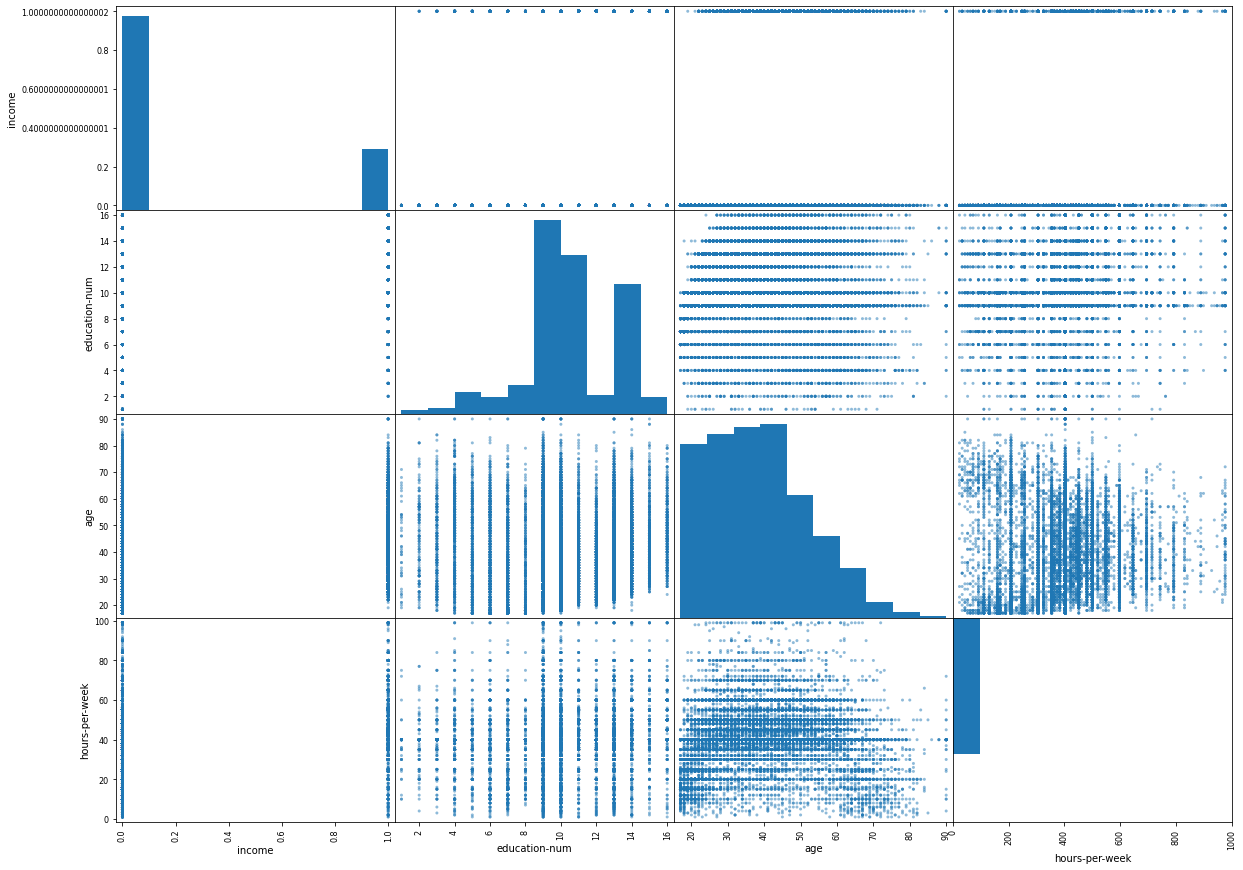

In [47]:
#Scatter matrix

from pandas.plotting import scatter_matrix
#seteo los atributos con mas correlacion que vimos arriba
attributes=['income','education-num','age','hours-per-week']
scatter_matrix(train_data[attributes], figsize=(20, 15))

# Ajusta los límites de los ejes
plt.xlim(0, 1000)
plt.ylim(-2, 4)

plt.show()



In [54]:
#Una vez terminada la obtencion de los datos, comienzo o sigo con la preparacion de los datos
#1 Elimino los datos nulos, vuelvo a revisar los datos si hay nulos
print(data.isnull().sum())
#en caso de que hayan celdas vacias, puedo usar imputter para rellenarlas
#en caso de querer convertir una variable categorica a numerica, puedo usar 
# onehot encoder, labelencoder, ordinalencoder
#en este caso son todas numericas



#Seguimos con el protocolo de limpieza en las siguientes features
display(data.head())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [59]:
#convertir valores categoricos a numericos
#Codificacion de variables categoricas
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.calibration import LabelEncoder
# Creamos un objeto encoder para codificar las características categóricas mediante one-hot encoding
encoder = OneHotEncoder()

# Aplicamos la codificación a un conjunto de datos
X_encoded = encoder.fit_transform(X)

# Creamos un objeto encoder para codificar las características categóricas mediante encoding ordinal
encoder = OrdinalEncoder()

# Aplicamos la codificación a un conjunto de datos
X_encoded = encoder.fit_transform(X)

#Ahora con label encoder
le = LabelEncoder()
X['workclass'] = le.fit_transform(X['workclass'])
X['education'] = le.fit_transform(X['education'])
X['marital-status'] = le.fit_transform(X['marital-status'])
X['occupation'] = le.fit_transform(X['occupation'])
X['race'] = le.fit_transform(X['race'])
X['sex'] = le.fit_transform(X['sex'])
X['native-country'] = le.fit_transform(X['native-country'])
X['relationship'] = le.fit_transform(X['relationship'])

#corroboro que haya cambiado a numerico
display(X.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [58]:
#Tratamiento de valores faltantes
from sklearn.impute import SimpleImputer

# Creamos un objeto Imputer con la estrategia de imputación que deseamos
imputer = SimpleImputer(strategy='mean')

# Aplicamos la imputación a un conjunto de datos
X_imputed = imputer.fit_transform(X)

In [60]:
#Ahora comenzamos con seleccionar el modelo de clasificacion
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

#Vuelvo a separar en train y test
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


#Creo una variable de clasificacion
y_train_1=(y_train==1)
y_test_1=(y_test==1)


#Selecciono el modelo de clasificacion
model=RandomForestClassifier()

#Entreno el modelo
model_train=model.fit(x_train,y_train_1)
#determino el valor en la region de entrenamiento con score
pred_train=model_train.score(x_train,y_train)
print("Valor en la region de entrenamiento: ",pred_train)

#Predigo los datos
y_test_pred=model.predict(x_test)

#Validacion cruzada
crossAccuracy=cross_val_score(model,X,Y,cv=5)
print("Validacion cruzada: ",crossAccuracy)


print("Valor en la region de prueba: ",accuracy_score(y_test_1,y_test_pred))


Valor en la region de entrenamiento:  0.9999616093366094
Validacion cruzada:  [0.85398434 0.84935504 0.85672604 0.86117936 0.86087224]
Valor en la region de prueba:  0.849531705819131


In [65]:
#Ahora lo implemento pero con el modelo de sgd
#Vuelvo a separar en train y test
from sklearn.linear_model import SGDClassifier


x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


#Creo una variable de clasificacion
y_train_1=(y_train==1)
y_test_1=(y_test==1)


#Selecciono el modelo de clasificacion
model=SGDClassifier()

#Entreno el modelo
model_train=model.fit(x_train,y_train_1)
#determino el valor en la region de entrenamiento con score
pred_train=model_train.score(x_train,y_train)
print("Valor en la region de entrenamiento: ",pred_train)

#Predigo los datos
y_test_pred=model.predict(x_test)

#Validacion cruzada
crossAccuracy=cross_val_score(model,X,Y,cv=5)
print("Validacion cruzada: ",crossAccuracy)

scoreAcc=accuracy_score(y_test_1,y_test_pred)
print("Valor en la region de prueba: ",scoreAcc)



Valor en la region de entrenamiento:  0.7848203316953317
Validacion cruzada:  [0.24090281 0.79054054 0.24078624 0.77441646 0.24078624]
Valor en la region de prueba:  0.7851988331030247


In [67]:
#Vamos a ajustar los hiperparametros solo de sgd
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

param_grid={
       'alpha': [0.001, 0.01, 0.1, 1],
    'max_iter': [1000, 5000],
    'tol': [0.0001, 0.001]
    
}

#defino la funcion de busqueda en cuadricula
GridSearch=GridSearchCV(SGDClassifier(),param_grid,cv=3,scoring='accuracy')
#entreno el modelo en funcion de busqueda de cuadricula
GridSearch.fit(x_train,y_train_1)

#Busco los mejores hiperparametros 
best_params=GridSearch.best_params_
#Re entreno con los mejores parametros

#Defino el mejor modelo
best_model=SGDClassifier(**best_params,random_state=42)
#Defino el mejor pipeline
best_pipeline = make_pipeline(
    StandardScaler(),
    best_model
)
#Re entreno el modelo
best_pipeline.fit(x_train, y_train_1)
accuracy=cross_val_score(best_pipeline,x_train,y_train_1,cv=3,scoring='accuracy')
print("SGD con hiperparametros: ",accuracy)


SGD con hiperparametros:  [0.76494299 0.76586433 0.76468556]


In [68]:
#Dummy classifier
from sklearn.dummy import DummyClassifier

Most_frequent = DummyClassifier(strategy='most_frequent')
accuracy=cross_val_score(Most_frequent,x_train,y_train_1,cv=3,scoring='accuracy')
print("Dummy classifier: ",accuracy)
# Obtener el valor más frecuente en y_train
most_frequent_class = y_train.value_counts().idxmax()
print("La clase más frecuente en y_train es:", most_frequent_class)

ones = 0
zeros = 0
for index, row in data.iterrows():
    if row['income'] == 1:
        ones += 1
    else:
        zeros += 1
print(f"La columna 'income' tiene {ones} celdas con valor 1 y {zeros} celdas con valor 0")

Dummy classifier:  [0.76022112 0.76022112 0.7601935 ]
La clase más frecuente en y_train es: 0
La columna 'income' tiene 7841 celdas con valor 1 y 24720 celdas con valor 0


In [69]:
#Generamos una matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_pred=cross_val_predict(SGDClassifier(),x_train,y_train_1,cv=3)
confusion_matrix(y_train_1,y_pred)

array([[19242,   560],
       [ 5122,  1124]])

In [70]:
#Impleentamos la Precision y recall
from sklearn.metrics import precision_score, recall_score

#calculo la precision
print("Precision: ",precision_score(y_train_1,y_pred))

#calculo el recall
print("Recall: ",recall_score(y_train_1,y_pred))

Precision:  0.667458432304038
Recall:  0.17995517130963817


In [71]:
#Implementamos f1 score
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_train_1,y_pred))

F1 Score: 0.2834804539722573


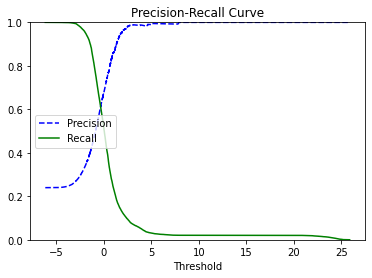

In [72]:
#Implementamos trade off de recall y precision
#precision/recall trade off curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve, f1_score, auc
import numpy as np

# Escalar los datos para que tengan media 0 y varianza 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

# Entrenar el clasificador SGD con el conjunto de entrenamiento escalado
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train_1)

# Obtener las puntuaciones de decisión del clasificador en lugar de las predicciones
y_scores = sgd_clf.decision_function(X_train_scaled)

# Calcular la precisión, sensibilidad (recall) y umbrales para la curva de Precisión-Recall
precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores)

# Crear un gráfico para visualizar la curva de Precisión-Recall
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")  # Trazar la precisión en función del umbral
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")  # Trazar la sensibilidad (recall) en función del umbral
plt.xlabel("Threshold")  # Etiqueta del eje x
plt.legend(loc="center left")  # Posición de la leyenda en el gráfico
plt.ylim([0, 1])  # Límites del eje y
plt.title("Precision-Recall Curve")  # Título del gráfico
plt.show()  # Mostrar el gráfico

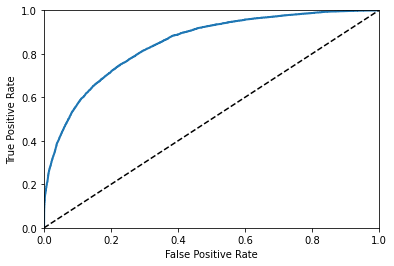

In [73]:
#Implementamos ROC curve
from sklearn.metrics import roc_curve

# Calcular la tasa de falsos positivos (fpr), tasa de verdaderos positivos (tpr) y umbrales para la curva ROC
fpr, tpr, thresholds = roc_curve(y_train_1, y_scores)

# Definir una función para graficar la curva ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)  # Graficar la curva ROC
    plt.plot([0, 1], [0, 1], 'k--')  # Graficar la línea diagonal que representa un clasificador aleatorio
    plt.axis([0, 1, 0, 1])  # Configurar los límites de los ejes x e y
    plt.xlabel('False Positive Rate')  # Etiqueta del eje x
    plt.ylabel('True Positive Rate')  # Etiqueta del eje y

# Graficar la curva ROC utilizando la función definida
plot_roc_curve(fpr, tpr)
plt.show()

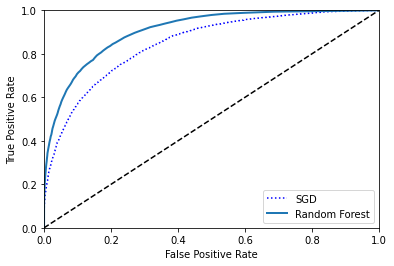

In [74]:
#comparar modelos con curva roc
from sklearn.ensemble import RandomForestClassifier

# Crear el clasificador RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

# Obtener las probabilidades de la clase positiva mediante validación cruzada
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_1, cv=3, method="predict_proba")

# Seleccionar sólo la probabilidad de la clase positiva
y_scores_forest = y_probas_forest[:, 1]

# Calcular la curva ROC
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_1, y_scores_forest)

# Graficar la curva ROC para compararla con la del modelo SGDClassifier
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [75]:
#multiclase clasificacion con OneVsOneClassifier
from sklearn.multiclass import OneVsOneClassifier
ovr_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovr_clf.fit(x_train,y_train)

#caso de multiclase con sdgcclassifier, no necesitamos las funciones anteriores
#ya que el clasificador lo hace por defecto
sgd_clf.fit(x_train,y_train)
cross_val_predict(sgd_clf,x_train,y_train,cv=3)

array([0, 0, 0, ..., 0, 1, 0])

In [76]:
#Analizamos el error
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

array([[12920,  6882],
       [ 3294,  2952]])

Confusion matrix:
[[4625  293]
 [1106  489]]


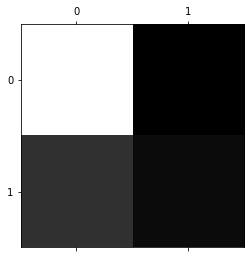

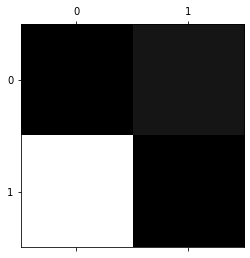

In [77]:
#analisis del error con graficos ,Revisar
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# Obtener la matriz de confusión
conf_mx = confusion_matrix(y_test, y_test_pred)
print(f'Confusion matrix:\n{conf_mx}')

# Mostrar la matriz de confusión como una imagen
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# Calcular la tasa de error por clase
# Calcular la suma de las filas de la matriz de confusión y mantener las dimensiones
row_sums = conf_mx.sum(axis=1, keepdims=True)

# Dividir cada elemento de la matriz de confusión por la suma de su fila
norm_conf_mx = conf_mx / row_sums

# Rellenar la diagonal con ceros para que no se muestre en el gráfico
np.fill_diagonal(norm_conf_mx, 0)

# Mostrar la matriz normalizada como una imagen en escala de grises
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
